<a href="https://colab.research.google.com/github/SurajMunna/payodaOnline-task/blob/main/PayodaOnlineTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1-- Importing the dataset**

In [45]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
data = pd.read_csv(io.BytesIO(uploaded['hepatitis.csv'])) 
print(data)

Saving hepatitis.csv to hepatitis (3).csv
     age     sex steroid  antivirals  ... albumin protime histology class
0     30    male   False       False  ...     4.0     NaN     False  live
1     50  female   False       False  ...     3.5     NaN     False  live
2     78  female    True       False  ...     4.0     NaN     False  live
3     31  female     NaN        True  ...     4.0    80.0     False  live
4     34  female    True       False  ...     4.0     NaN     False  live
..   ...     ...     ...         ...  ...     ...     ...       ...   ...
150   46  female    True       False  ...     3.3    50.0      True   die
151   44  female    True       False  ...     4.3     NaN      True  live
152   61  female   False       False  ...     4.1     NaN      True  live
153   53    male   False       False  ...     4.1    48.0      True  live
154   43  female    True       False  ...     3.1    42.0      True   die

[155 rows x 20 columns]


**Step2---Cleaning Of Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [ ]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,False,live


**Checking for missing values**

In [ ]:
data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

**CorrelationHeatMap** 

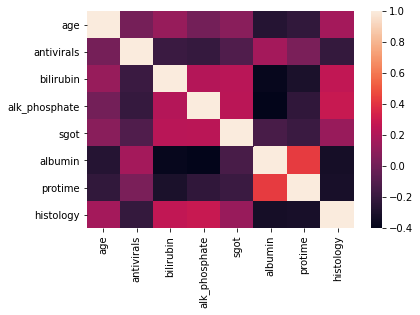

In [46]:
# import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
# infert = com.importr("ISLR")

# load the Auto dataset
# auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Correlation matrix**

In [47]:
corr

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


**Histology is true for all females**

In [72]:
data.loc[(data['histology']==True),['sex']].value_counts()

sex   
female    66
male       4
dtype: int64

**Comparison  of antivirals and sleen,spiders,varices**

In [71]:
data.loc[(data['antivirals']==True),['spleen_palpable','spiders','varices']].value_counts()

spleen_palpable  spiders  varices
False            False    False      19
                 True     False       4
True             False    False       1
dtype: int64

**Comparison of steroid and liver big**

In [70]:
data.loc[(data['steroid']==True),['liver_big']].value_counts()

liver_big
True         67
False         7
dtype: int64

**Comparison of ascites and liverbig**

In [69]:
data.loc[(data['ascites']==True),['liver_big']].value_counts()

liver_big
True         16
False         1
dtype: int64

**Comparison of malaise and liverbig**

In [68]:
data.loc[(data['malaise']==True),['liver_big']].value_counts()

liver_big
True         44
False        11
dtype: int64

**Comparison of class and sex**

In [67]:
data.loc[(data['class']=='die'),['sex']].value_counts()

sex   
female    32
dtype: int64

**Here is a line graph for age of male and female evidently we can see that population of female is high in which age 30-40 is high**

sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

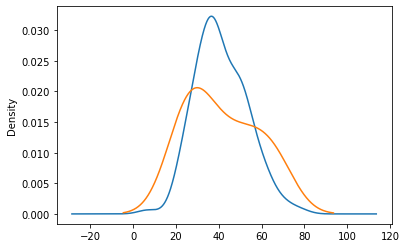

In [65]:
import matplotlib.pyplot as plt
data.groupby('sex').age.plot(kind='kde')

In [66]:
data['sex'].value_counts()

female    139
male       16
Name: sex, dtype: int64

Interpretation
Antiviral will prevent spleen,spider and vertices
The patient with malaise will have fatigue but the vice versa need not be true.
The patient with ascites will have enlarged liver.
Mostly affected age group is 30-40. 